In [1]:
import mdtraj as md
import numpy as np

import re
import numpy
from tqdm import tqdm
from pathlib import Path
from natsort import natsorted

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [11]:
subsampled_ftraj = np.load('subsampled_ftraj.npy', allow_pickle=True)
mapping = np.load('mapping.npy', allow_pickle=True)
spatial_group_labels = np.load('spatial_group_labels.npy', allow_pickle=True)

In [8]:
from sklearn.cluster import DBSCAN

In [17]:
angles = subsampled_ftraj[:, 2:]*180/np.pi
angles.shape

(36636, 7)

In [31]:
DFGin = angles[spatial_group_labels == 3]
DFGin.shape

(33408, 7)

In [32]:
DFGout = angles[spatial_group_labels == 1]
DFGout.shape

(2660, 7)

In [33]:
DFGinter = angles[spatial_group_labels == 2]
DFGinter.shape

(568, 7)

(-180.0, 180.0)

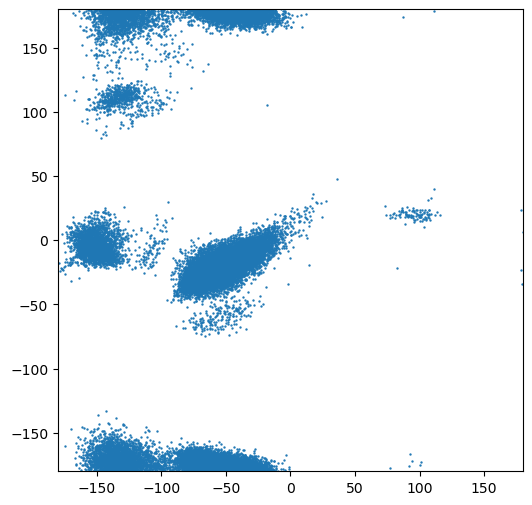

In [38]:
# Scatter of X-DFG dihedrals 

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(DFGin[:, 0], DFGin[:, 3], s=0.5)
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])

(-180.0, 180.0)

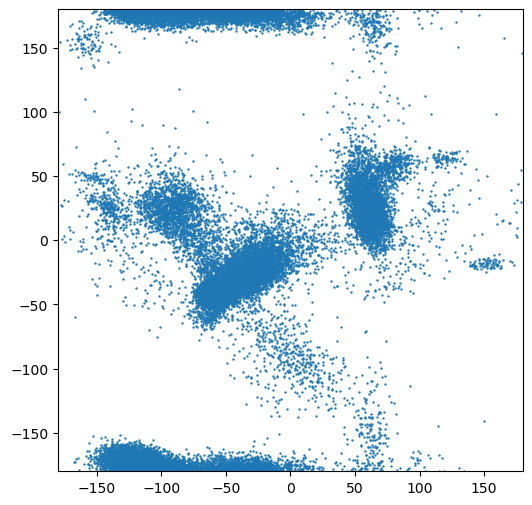

In [39]:
# Scatter of DFG-Asp dihedrals 

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(DFGin[:, 1], DFGin[:, 4], s=0.5)
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])

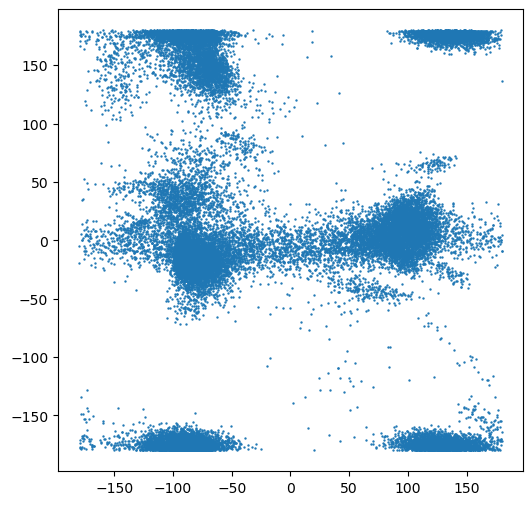

In [43]:
# Ramachandran of DFG-Phe dihedrals 

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(DFGin[:, 2], DFGin[:, 5], s=0.5)

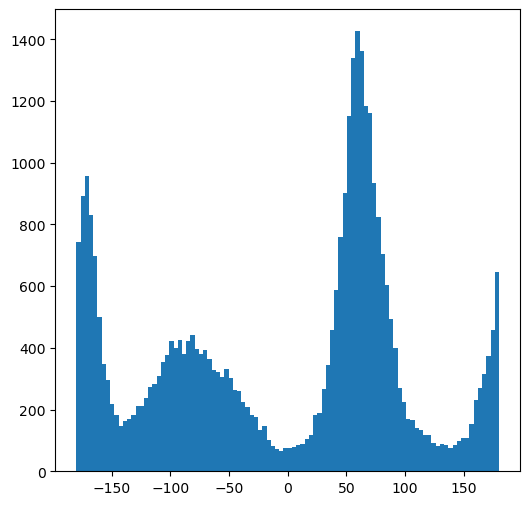

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))
_ = ax.hist(angles[:, 6], bins=100)

In [83]:
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan.fit(DFGin)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [85]:
DFGin[dbscan.labels_ == 0, :].shape

(4, 7)

In [86]:
DFGin[dbscan.labels_ == 1, :].shape

(4, 7)

In [87]:
DFGin[dbscan.labels_ == -1, :].shape

(33376, 7)